In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

In [3]:
nci_160 = pd.read_csv('/Users/Life_Is_Beautiful/Data_Science/Machine_Learning/ISLR_Exercises/ISLR Data Sets/NCI60.csv',index_col = 0)

In [4]:
nci_160.head()
nci_labs = nci_160.labs
nci_data = nci_160.drop(labels='labs',axis=1)

In [5]:
nci_160.head(3)

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-0.070000,0.350000,-0.315000,-0.450000,-0.654981,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
V2,0.679961,1.289961,0.169961,0.379961,0.464961,0.579961,0.699961,0.724961,-0.040039,-0.285020,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS


In [6]:
nci_labs.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
MCF7A-repro    1
K562B-repro    1
UNKNOWN        1
MCF7D-repro    1
K562A-repro    1
Name: labs, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(nci_data)

Text(0.5, 1.0, 'Single Linkage')

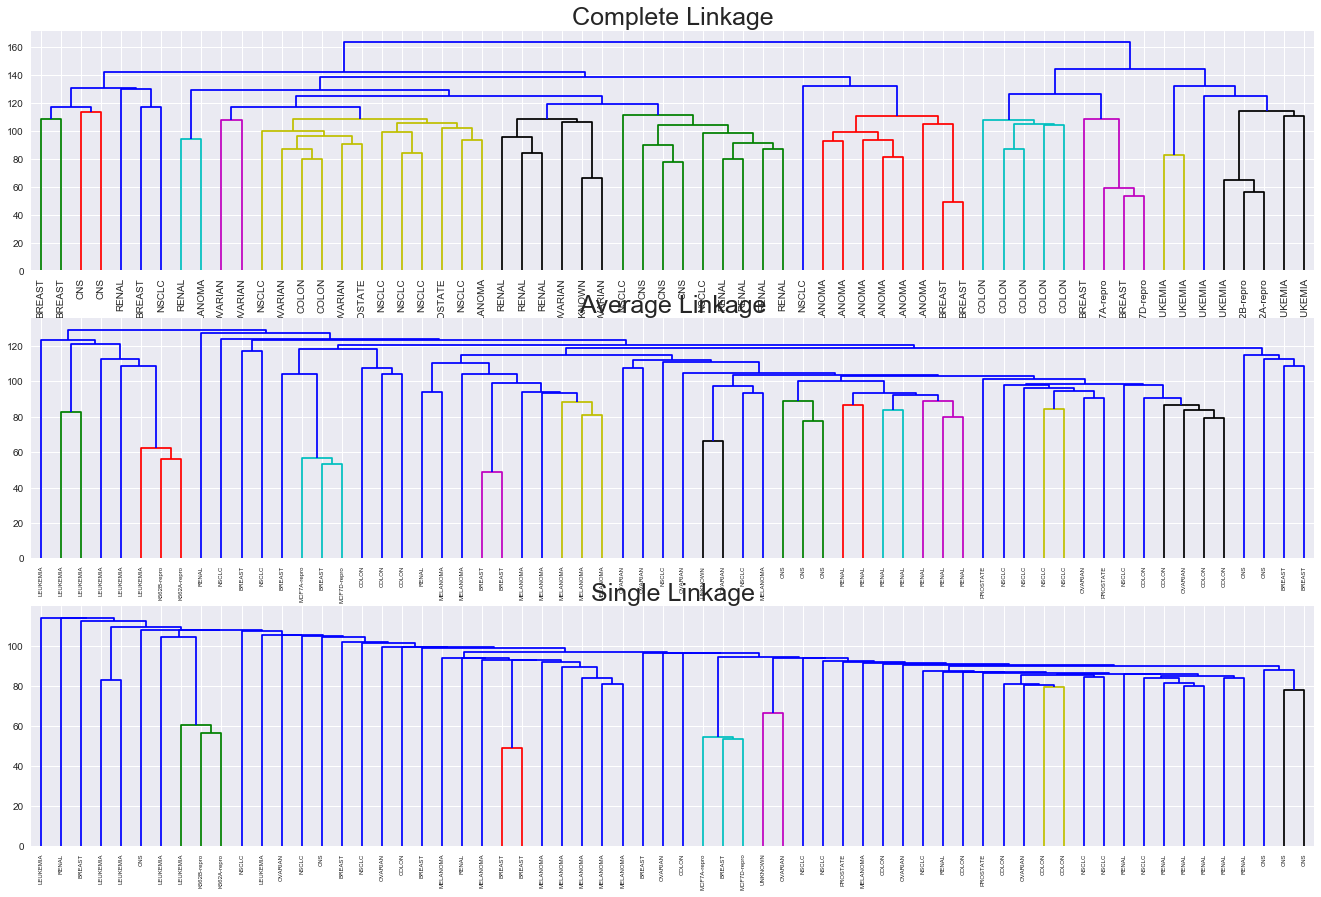

In [9]:
from scipy.cluster.hierarchy import dendrogram,linkage, cut_tree 

f, axes = plt.subplots(3, 1, sharex=False, sharey=False)

f.set_figheight(15)
f.set_figwidth(23)

dendrogram(linkage(x_scaled,method='complete'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=10,
           ax=axes[0])

dendrogram(linkage(x_scaled,method='average'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6,
           ax = axes[1])

dendrogram(linkage(x_scaled,method='single'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[2])

axes[0].set_title('Complete Linkage',size=25)
axes[1].set_title('Average Linkage', size=25)
axes[2].set_title('Single Linkage', size=25)

In [12]:
hc_clustering = cut_tree(linkage(x_scaled,method='complete'),4).ravel()

In [15]:
pd.crosstab(hc_clustering,nci_labs)

labs,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
row_0,,,,,,,,,,,,,,
0,2,3,2,0,0,0,0,0,8,8,6,2,8,1
1,3,2,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,1,1,6,0,0,0,0,0,0,0,0
3,2,0,5,0,0,0,1,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Complete Linkage')

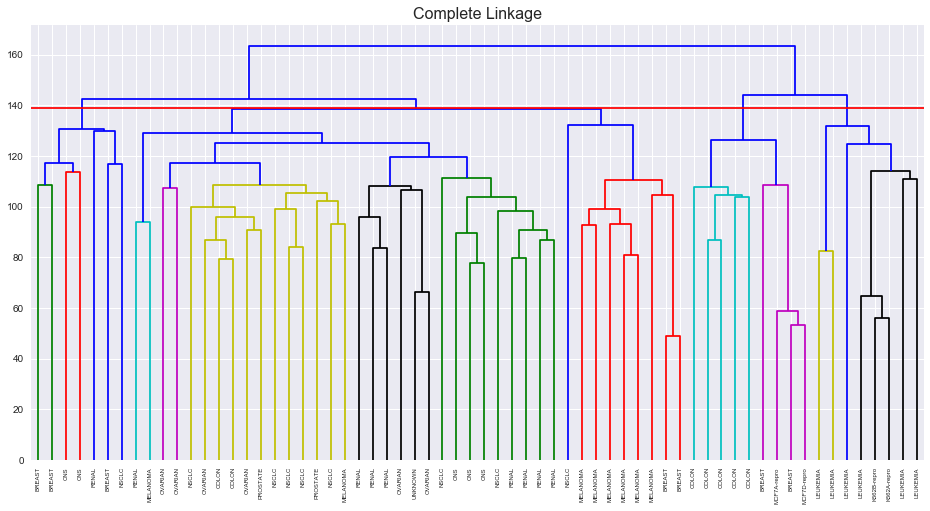

In [20]:
plt.figure(figsize=(16,8))

dendrogram(linkage(x_scaled, method='complete'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6)

plt.axhline(y=139,c='r')
plt.title('Complete Linkage',size=16)